# Titanic Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings(action='ignore')

import seaborn as sns
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings(action='ignore')
import seaborn as sns
from pandas.plotting import scatter_matrix
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

from sklearn import tree

In [2]:
titanic=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv")
titanic


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:

titanic.tail(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
titanic.describe

<bound method NDFrame.describe of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                 

In [10]:
titanic.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [11]:
titanic.corr

<bound method DataFrame.corr of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [12]:
titanic.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [13]:
titanic.mean()

PassengerId    446.000000
Survived         0.383838
Pclass           2.308642
Age             29.699118
SibSp            0.523008
Parch            0.381594
Fare            32.204208
dtype: float64

In [14]:
titanic.groupby('Embarked')

In [15]:
titanic.groupby('Embarked').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Embarked,,,,,,,
C,445.357143,0.553571,1.886905,30.814769,0.386905,0.363095,59.954144
Q,417.896104,0.389610,2.909091,28.089286,0.428571,0.168831,13.276030
S,449.527950,0.336957,2.350932,29.445397,0.571429,0.413043,27.079812


# Data Analysis
Countplot:

<function matplotlib.pyplot.show(close=None, block=None)>

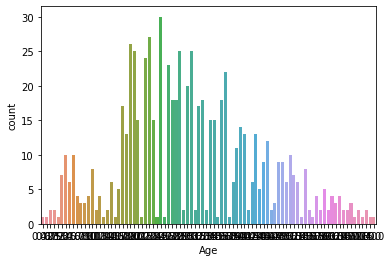

In [16]:
sns.countplot(titanic['Age'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

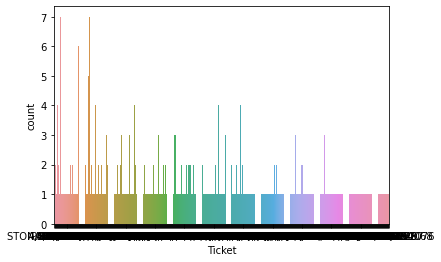

In [17]:
sns.countplot(titanic['Ticket'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

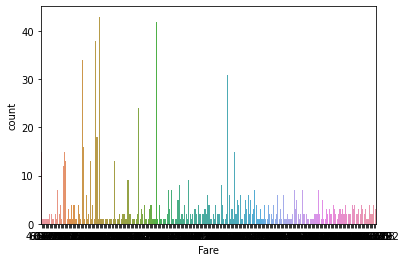

In [18]:
sns.countplot(titanic['Fare'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

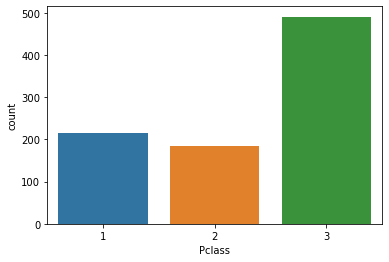

In [19]:
sns.countplot(titanic['Pclass'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

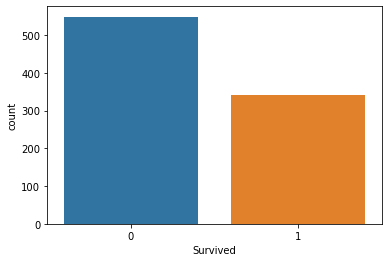

In [20]:
sns.countplot(titanic['Survived'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

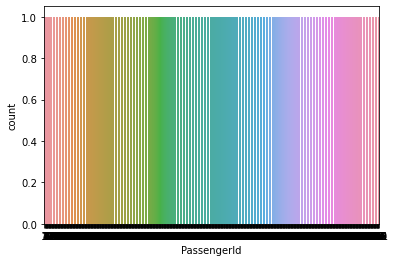

In [21]:
sns.countplot(titanic['PassengerId'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

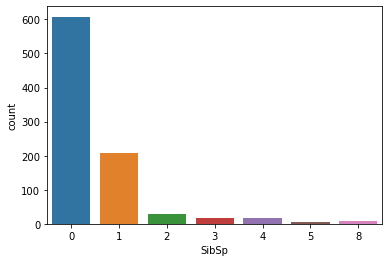

In [22]:
sns.countplot(titanic['SibSp'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

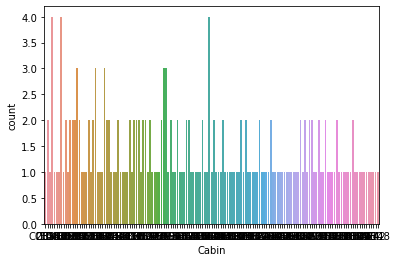

In [23]:
sns.countplot(titanic['Cabin'])
plt.show

In [24]:
titanic.isnull().values.any()

True

In [25]:
titanic.shape

(891, 12)

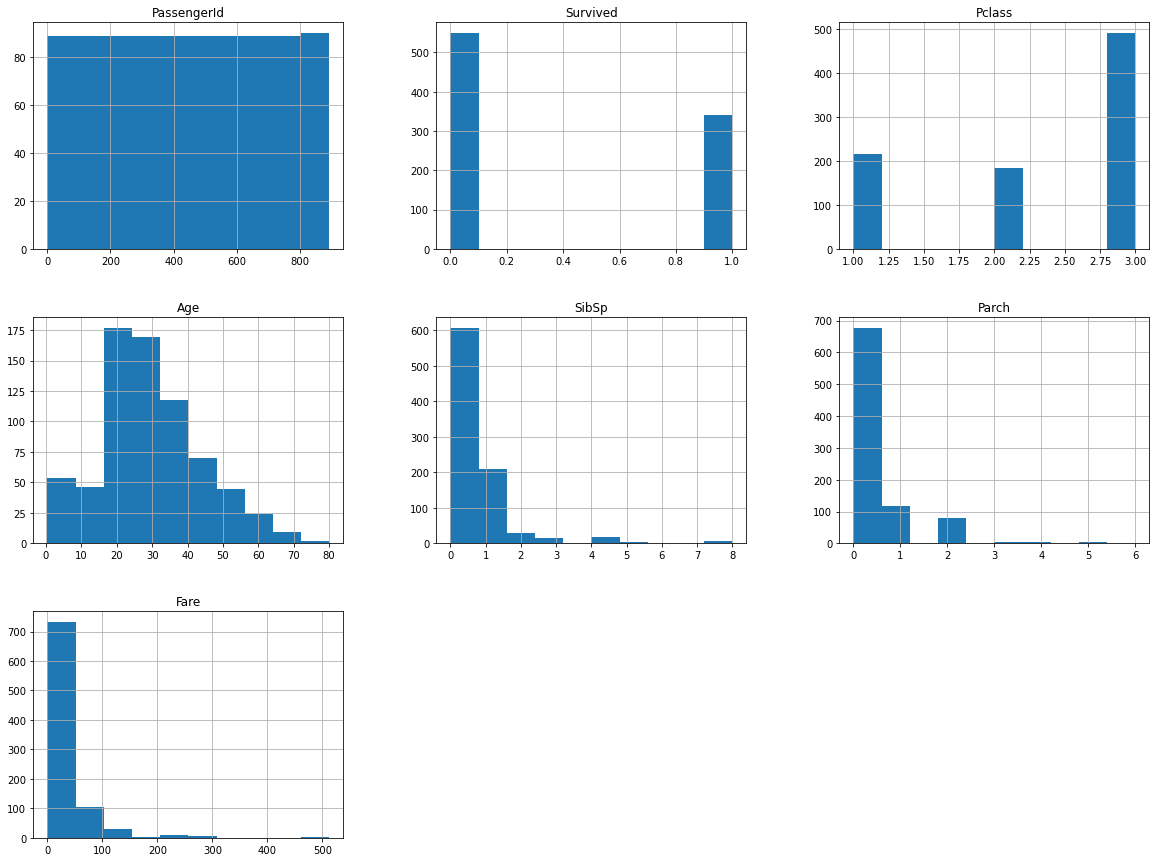

In [26]:
titanic.hist(bins=10,figsize=(20,15))
plt.show()

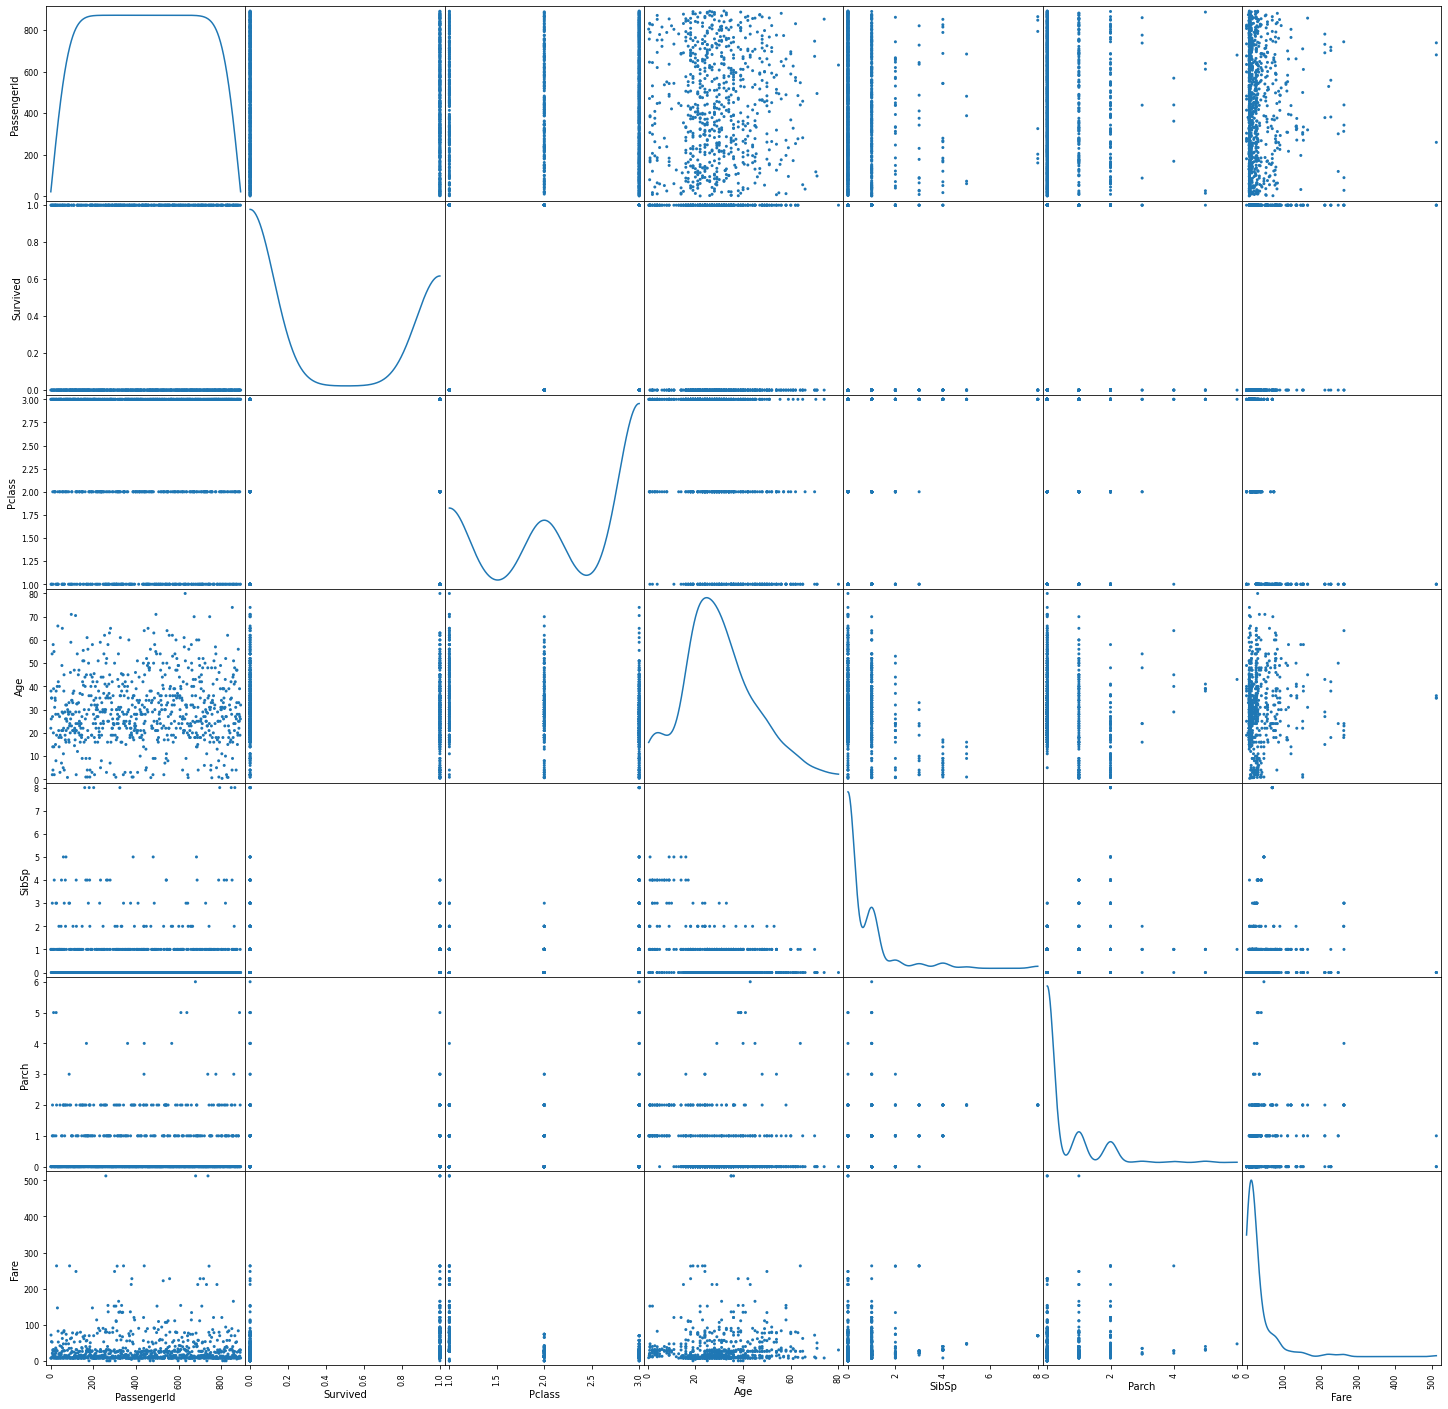

In [27]:
scatter_matrix(titanic,alpha=1,figsize=(25,25),diagonal='kde')
plt.show()

<AxesSubplot:>

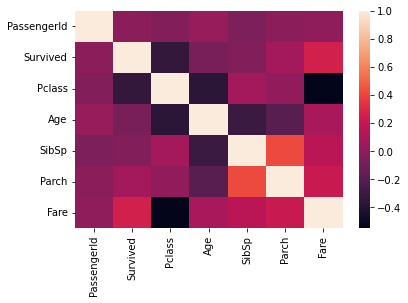

In [28]:
sns.heatmap(titanic.corr())

In [30]:
sex=titanic['Sex']
category = pd.get_dummies(sex)
category.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [31]:
f=titanic.drop('Sex',axis=1).join(category)

In [32]:
abb=titanic.drop('Embarked',axis=1)

# Dividing data into test and training set

In [33]:
shuffle_index = np.random.permutation(len(f))
shuffle_index

array([ 49,  68, 288, 138, 217, 187, 504, 255, 857, 698, 467, 248, 875,
       518, 344,  34,  61,  65, 764, 517, 606, 196, 234, 766,  46, 497,
       668,   8,  71, 840,  14,  47, 437, 302, 537, 827, 797, 881, 500,
       847, 459, 538,  28, 529, 269, 735, 841, 243,  11, 392, 727,  40,
        56, 387, 151, 399,  67, 664, 632,  24, 472, 733, 245, 614, 816,
       772, 781, 659, 879, 609, 834, 789, 275, 495, 583, 152, 753,  95,
       449, 605, 672, 800, 725, 324, 411, 410, 629,  86, 105, 873, 616,
       569, 723, 636, 869, 223, 575, 303, 690, 555, 430, 102, 825, 863,
       167, 522, 625, 620, 406, 227, 136, 272,  29, 477, 239, 436, 470,
       154, 503, 194, 353, 320, 266, 117, 326, 125, 759, 660, 765, 573,
       880, 846, 357, 793, 550, 770, 651, 720, 480, 456, 474, 548, 486,
        38, 475, 206, 565, 111, 145, 452, 854, 461, 285, 169, 402, 512,
       415, 331, 212, 613, 218, 444, 622, 769, 642, 403, 639, 142, 435,
       241, 510, 401, 334, 757, 654, 338, 871, 309,   0, 527, 66

In [34]:
test_size = int( len(shuffle_index) * 0.2)
test_size


178

In [35]:
test_data = shuffle_index[:test_size]
train_data = shuffle_index[test_size:]
train = f.iloc[train_data]
test = f.iloc[test_data]

# Prediction using Decision Tree Regressor

In [36]:
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)

In [37]:
train.isnull().sum()
print("Train Shape:",train.shape)
test.isnull().sum()
print("Test Shape:",test.shape)

Train Shape: (713, 13)
Test Shape: (178, 13)


In [38]:
test.isnull().sum()
test["Survived"] = ""
test.head()


,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female,male
49,50,,3,"Arnold-Franchi, Mrs. Josef (Josefine Franchi)",18.0,1,0,349237,17.8000,NaN,S,1,0
68,69,,3,"Andersson, Miss. Erna Alexandra",17.0,4,2,3101281,7.9250,NaN,S,1,0
288,289,,2,"Hosono, Mr. Masabumi",42.0,0,0,237798,13.0000,NaN,S,0,1
138,139,,3,"Osen, Mr. Olaf Elon",16.0,0,0,7534,9.2167,NaN,S,0,1
217,218,,2,"Jacobsohn, Mr. Sidney Samuel",42.0,1,0,243847,27.0000,NaN,S,0,1


In [39]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))


In [40]:
train.head(10)



,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female,male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
527,528,0,1,"Farthing, Mr. John",NaN,0,0,PC 17483,221.7792,C95,S,0,1
669,670,1,1,"Taylor, Mrs. Elmer Zebley (Juliet Cummins Wright)",NaN,1,0,19996,52.0000,C126,S,1,0
718,719,0,3,"McEvoy, Mr. Michael",NaN,0,0,36568,15.5000,NaN,Q,0,1
709,710,1,3,"Moubarek, Master. Halim Gonios (""William George"")",NaN,1,1,2661,15.2458,NaN,C,0,1
364,365,0,3,"O'Brien, Mr. Thomas",NaN,1,0,370365,15.5000,NaN,Q,0,1
830,831,1,3,"Yasbeck, Mrs. Antoni (Selini Alexander)",15.0,1,0,2659,14.4542,NaN,C,1,0
74,75,1,3,"Bing, Mr. Lee",32.0,0,0,1601,56.4958,NaN,S,0,1
267,268,1,3,"Persson, Mr. Ernst Ulrik",25.0,1,0,347083,7.7750,NaN,S,0,1
13,14,0,3,"Andersson, Mr. Anders Johan",39.0,1,5,347082,31.2750,NaN,S,0,1


In [41]:
train_test_data = [train,test] # combine dataset

for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [42]:
train['Title'].value_counts()

Mr          411
Miss        145
Mrs         101
Master       35
Rev           6
Dr            3
Col           2
Mlle          2
Ms            1
Don           1
Major         1
Jonkheer      1
Capt          1
Mme           1
Sir           1
Lady          1
Name: Title, dtype: int64

In [43]:
test['Title'].value_counts()

Mr          106
Miss         37
Mrs          24
Master        5
Dr            4
Major         1
Countess      1
Name: Title, dtype: int64

In [44]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }

for dataset in train_test_data:
    dataset['Title'] = dataset["Title"].map(title_mapping)

In [45]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female,male,Title
49,50,,3,"Arnold-Franchi, Mrs. Josef (Josefine Franchi)",18.0,1,0,349237,17.8000,NaN,S,1,0,2
68,69,,3,"Andersson, Miss. Erna Alexandra",17.0,4,2,3101281,7.9250,NaN,S,1,0,1
288,289,,2,"Hosono, Mr. Masabumi",42.0,0,0,237798,13.0000,NaN,S,0,1,0
138,139,,3,"Osen, Mr. Olaf Elon",16.0,0,0,7534,9.2167,NaN,S,0,1,0
217,218,,2,"Jacobsohn, Mr. Sidney Samuel",42.0,1,0,243847,27.0000,NaN,S,0,1,0


In [46]:
test.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female,male,Title
49,50,,3,"Arnold-Franchi, Mrs. Josef (Josefine Franchi)",18.0,1,0,349237,17.8000,NaN,S,1,0,2
68,69,,3,"Andersson, Miss. Erna Alexandra",17.0,4,2,3101281,7.9250,NaN,S,1,0,1
288,289,,2,"Hosono, Mr. Masabumi",42.0,0,0,237798,13.0000,NaN,S,0,1,0
138,139,,3,"Osen, Mr. Olaf Elon",16.0,0,0,7534,9.2167,NaN,S,0,1,0
217,218,,2,"Jacobsohn, Mr. Sidney Samuel",42.0,1,0,243847,27.0000,NaN,S,0,1,0


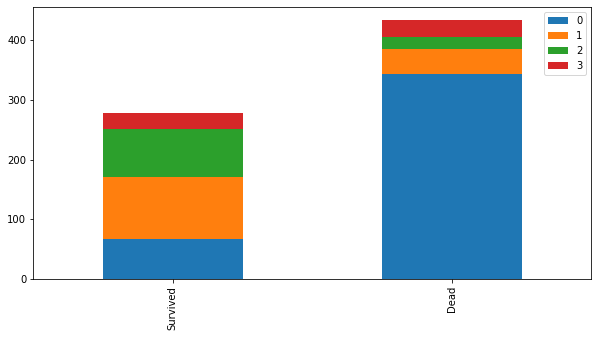

In [47]:
bar_chart('Title')

In [48]:
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)


In [49]:
train.head()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female,male,Title
0,1,0,3,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1,0
527,528,0,1,NaN,0,0,PC 17483,221.7792,C95,S,0,1,0
669,670,1,1,NaN,1,0,19996,52.0000,C126,S,1,0,2
718,719,0,3,NaN,0,0,36568,15.5000,NaN,Q,0,1,0
709,710,1,3,NaN,1,1,2661,15.2458,NaN,C,0,1,3


In [50]:
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace= True)
test["Age"].fillna(test.groupby('Title')['Age'].transform("median"), inplace= True)

In [51]:
train.head(30)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female,male,Title
0,1,0,3,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1,0
527,528,0,1,30.0,0,0,PC 17483,221.7792,C95,S,0,1,0
669,670,1,1,35.0,1,0,19996,52.0000,C126,S,1,0,2
718,719,0,3,30.0,0,0,36568,15.5000,NaN,Q,0,1,0
709,710,1,3,9.0,1,1,2661,15.2458,NaN,C,0,1,3
364,365,0,3,30.0,1,0,370365,15.5000,NaN,Q,0,1,0
830,831,1,3,15.0,1,0,2659,14.4542,NaN,C,1,0,2
74,75,1,3,32.0,0,0,1601,56.4958,NaN,S,0,1,0
267,268,1,3,25.0,1,0,347083,7.7750,NaN,S,0,1,0
13,14,0,3,39.0,1,5,347082,31.2750,NaN,S,0,1,0


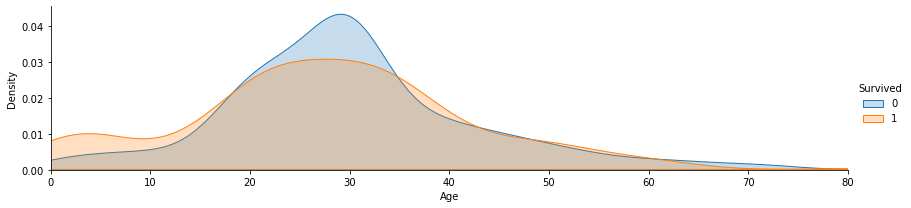

(10.0, 50.0)

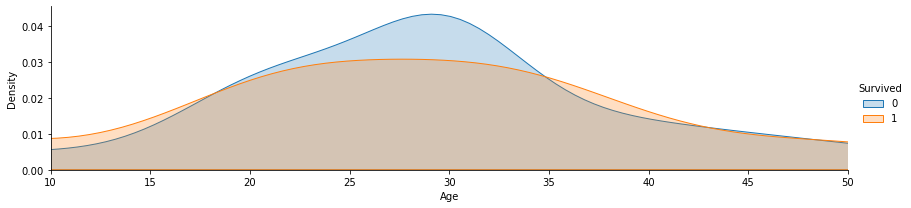

In [52]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend() 
plt.show()

facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend() 
plt.xlim(10,50)


In [53]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 713 entries, 0 to 809
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  713 non-null    int64  
 1   Survived     713 non-null    int64  
 2   Pclass       713 non-null    int64  
 3   Age          713 non-null    float64
 4   SibSp        713 non-null    int64  
 5   Parch        713 non-null    int64  
 6   Ticket       713 non-null    object 
 7   Fare         713 non-null    float64
 8   Cabin        165 non-null    object 
 9   Embarked     712 non-null    object 
 10  female       713 non-null    uint8  
 11  male         713 non-null    uint8  
 12  Title        713 non-null    int64  
dtypes: float64(2), int64(6), object(3), uint8(2)
memory usage: 68.2+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 178 entries, 49 to 309
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0

In [54]:
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

(0.0, 11.0)

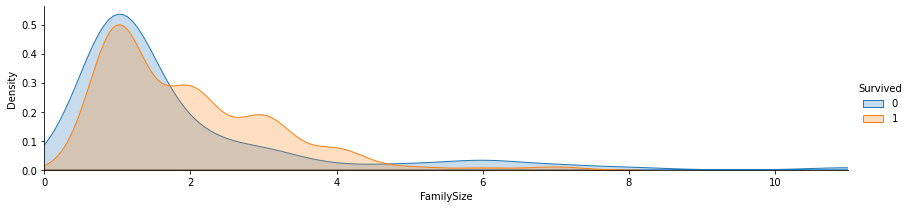

In [55]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'FamilySize',shade= True)
facet.set(xlim=(0, train['FamilySize'].max()))
facet.add_legend()
plt.xlim(0)

In [56]:
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [57]:
train.head()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female,male,Title,FamilySize
0,1,0,3,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1,0,0.4
527,528,0,1,30.0,0,0,PC 17483,221.7792,C95,S,0,1,0,0.0
669,670,1,1,35.0,1,0,19996,52.0000,C126,S,1,0,2,0.4
718,719,0,3,30.0,0,0,36568,15.5000,NaN,Q,0,1,0,0.0
709,710,1,3,9.0,1,1,2661,15.2458,NaN,C,0,1,3,0.8


In [58]:
features_drop = ['Ticket','SibSp','Parch']
train = train.drop(features_drop, axis = 1)
test = test.drop(features_drop,axis=1)
train = train.drop(['PassengerId'], axis=1)

In [59]:
train_data = train.drop('Survived', axis = 1)
target = train['Survived']
train_data.shape, target.shape

((713, 9), (713,))

In [61]:
train_data.head(10)


,Pclass,Age,Fare,Cabin,Embarked,female,male,Title,FamilySize
0,3,22.0,7.2500,NaN,S,0,1,0,0.4
527,1,30.0,221.7792,C95,S,0,1,0,0.0
669,1,35.0,52.0000,C126,S,1,0,2,0.4
718,3,30.0,15.5000,NaN,Q,0,1,0,0.0
709,3,9.0,15.2458,NaN,C,0,1,3,0.8
364,3,30.0,15.5000,NaN,Q,0,1,0,0.4
830,3,15.0,14.4542,NaN,C,1,0,2,0.4
74,3,32.0,56.4958,NaN,S,0,1,0,0.0
267,3,25.0,7.7750,NaN,S,0,1,0,0.4
13,3,39.0,31.2750,NaN,S,0,1,0,2.4


In [62]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 713 entries, 0 to 809
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    713 non-null    int64  
 1   Pclass      713 non-null    int64  
 2   Age         713 non-null    float64
 3   Fare        713 non-null    float64
 4   Cabin       165 non-null    object 
 5   Embarked    712 non-null    object 
 6   female      713 non-null    uint8  
 7   male        713 non-null    uint8  
 8   Title       713 non-null    int64  
 9   FamilySize  713 non-null    float64
dtypes: float64(3), int64(3), object(2), uint8(2)
memory usage: 51.5+ KB


In [63]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [64]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np

In [65]:
clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[nan nan nan nan nan nan nan nan nan nan]


In [66]:
clf = [KNeighborsClassifier(n_neighbors = 13),DecisionTreeClassifier(),
       RandomForestClassifier(n_estimators=13),GaussianNB(),SVC(),ExtraTreeClassifier(),
      GradientBoostingClassifier(n_estimators=10, learning_rate=1,max_features=3, max_depth =3, random_state = 10),AdaBoostClassifier(),ExtraTreesClassifier()]
def model_fit():
    scoring = 'accuracy'
    for i in range(len(clf)):
        score = cross_val_score(clf[i], train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
        print("Score of Model",i,":",round(np.mean(score)*100,2))
#     round(np.mean(score)*100,2)
#     print("Score of :\n",score)
model_fit()

Score of Model 0 : nan
Score of Model 1 : nan
Score of Model 2 : nan
Score of Model 3 : nan
Score of Model 4 : nan
Score of Model 5 : nan
Score of Model 6 : nan
Score of Model 7 : nan
Score of Model 8 : nan


In [74]:
X_train = titanic.drop("Survived", axis=1)
Y_train = titanic["Survived"]
X_test  = titanic.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape


((891, 11), (891,), (891, 11))